# A1)

## a)

- **fun_true** berechnet die Y-Werte der Funktion 2 -x + 3x^2 zu einem gegebenen Input-Vektor X, **generateDataSet** erzeugt zufällige Test-Daten (X,T) im X-Bereich xmin bis xmax. Die zugehörigen Funktionswerte T, werden (von der wahren Funktion ausgehend) mit um sd_noise normalverteilten Noise versehen. **getDataError** berechnet die Summe der Fehlerquadrate (Least Squares Error), den es zu minimieren gilt. **phi_polynomial** berechnet für einen Wert x den entsprechenden "Polynom-Vektor" 1 x x^2 x^3 ... vom gegebenen Grad "deg" (default=1). Diese Funktion wird benötigt um hinterher die Merkmalsvektoren zu erstellen, die die Design-Matrix ergeben.
- Die Daten sind von der Funktion 2 - x + 3x^2 gesampelt (zzgl. Noise)
- Die **Basis-Funktionen** sind phi(0)=1, phi(1)=x^1 ..., phi(deg)=x^deg (Annahme: polynomielle Basisfunktionen => Basisfunktionen müssen nicht zwangsläufig polynomiell sein). Die 0-te Basis-Funktion wird auch "Bias" genannt (Verschieben der Kurve um entsprechenden Gewichtswert w0).
- **lambda** ist der Regularisierungs-Koeffizient, der die relative Gewichtung zwischen der eigentlichen (Daten-)Fehler-Funktion (z.B. least-squares) und dem sogenannten Gewichts-Fehler angibt. Mit dem Gewichts-Fehler versucht man Overfitting zu vermeiden, indem große Gewichte bestraft werden. Große (absolute) Gewichtskomponenten deuten nämlich auf Overfitting hin.
- **X,T** sind die Daten für das spätere Training, **X_test,T_test** dienen dann dem Testen des Modells. Erzeugt werden die Daten aber gleich (mittels Funktion generateDataSet)
- **grüne Kreuze** = Lern-Daten ("wahre" Funktion + Noise), **grüne Punkte** = Test-Daten ("wahre" Funktion + Noise), **grüne Kurve** = "wahre" Funktion 2 -x + 3x^2, **rote Kurve** = Prognose-Kurve (Ergebnis der least squares Regression)

## b)

X= [[ 2.71320643]
 [-4.79248051]
 [ 1.33648235]
 [ 2.48803883]
 [-0.01492988]
 [-2.75203354]
 [-3.01937135]
 [ 2.60530712]
 [-3.30889163]
 [-4.11660186]] T= [[24.02637686]
 [76.78157398]
 [ 6.06498717]
 [16.33697066]
 [ 6.34586048]
 [39.50347318]
 [22.71852474]
 [30.04030926]
 [40.44148448]
 [61.40721056]]
PHI= [[ 1.00000000e+00  2.71320643e+00  7.36148915e+00  1.99732397e+01
   5.41915225e+01  1.47032787e+02]
 [ 1.00000000e+00 -4.79248051e+00  2.29678694e+01 -1.10073066e+02
   5.27523025e+02 -2.52814381e+03]
 [ 1.00000000e+00  1.33648235e+00  1.78618507e+00  2.38720482e+00
   3.19045710e+00  4.26398961e+00]
 [ 1.00000000e+00  2.48803883e+00  6.19033720e+00  1.54017993e+01
   3.83202746e+01  9.53423310e+01]
 [ 1.00000000e+00 -1.49298770e-02  2.22901226e-04 -3.32788789e-06
   4.96849568e-08 -7.41790292e-10]
 [ 1.00000000e+00 -2.75203354e+00  7.57368863e+00 -2.08430452e+01
   5.73607595e+01 -1.57858734e+02]
 [ 1.00000000e+00 -3.01937135e+00  9.11660336e+00 -2.75264110e+01
   8.31124569e+

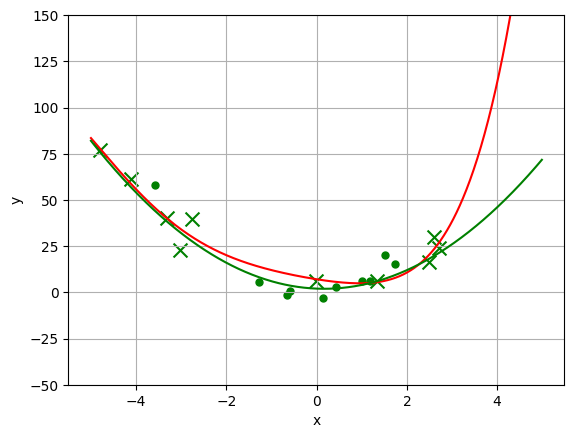

In [2]:
# V2A1_LinearRegression.py 
# Programmgeruest zu Versuch 2, Aufgabe 1
import numpy as np 
import matplotlib.pyplot as plt

def fun_true(X):                              # compute 1-dim. parable function; X must be Nx1 data matrix
    w2,w1,w0 = 3.0,-1.0,2.0                   # true parameters of parable y(x)=w0+w1*x+w2*x*x
    return w0+w1*X+w2*np.multiply(X,X)        # return function values (same size as X)

def generateDataSet(N,xmin,xmax,sd_noise):    # generate data matrix X and target values T
    X=xmin+np.random.rand(N,1)*(xmax-xmin)    # get random x values uniformly in [xmin;xmax)
    T=fun_true(X);                            # target values without noise
    if(sd_noise>0):
        T=T+np.random.normal(0,sd_noise,X.shape) # add noise 
    return X,T

def getDataError(Y,T):                        # compute data error (least squares) between prediction Y and true target values T
    D=np.multiply(Y-T,Y-T);                   # squared differences between Y and T
    return 0.5*sum(sum(D));                   # return least-squares data error function E_D

def phi_polynomial(x,deg=1):                            # compute polynomial basis function vector phi(x) for data x 
    assert(np.shape(x)==(1,)), "currently only 1dim data supported"
    return np.array([x[0]**i for i in range(deg+1)]).T; # returns feature vector phi(x)=[1 x x**2 x**3 ... x**deg]

# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=5                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("Y_test=",Y_test)
print("T_test=",T_test)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

# (IV) plot data
ymin,ymax = -50.0,150.0                     # interval of y data
x_=np.arange(xmin,xmax,0.01)                # densely sampled x values
Y_LSR = np.array([np.dot(W_LSR.T,np.array([phi_polynomial([x],deg)]).T)[0] for x in x_]);   # least squares prediction
Y_true = fun_true(x_).flat

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X.flat,T.flat,c='g',marker='x',s=100)             # plot learning data points (green x)
ax.scatter(X_test.flat,T_test.flat,c='g',marker='.',s=100)   # plot test data points (green .)
ax.plot(x_,Y_LSR.flat, c='r')         # plot LSR regression curve (red)
ax.plot(x_,Y_true, c='g')             # plot true function curve (green)
ax.set_xlabel('x')                    # label on x-axis
ax.set_ylabel('y')                    # label on y-axis
ax.grid()                             # draw a grid
plt.ylim((ymin,ymax))                 # set y-limits
plt.show()                            # show plot on screen



## c)

- Gewichte: w0=7.065, w1=-3.869, w2=1.161, w3=0.275, w4=0.231, w5=0.026, Lern-Datenfehler 151.670, Test-Datenfehler 396.936. Der Test-Datenfehler ist größer da sich die Gewichte ja entsprechend den Trainings-/Lern-Daten anpassen (Overfitting) und wir diesem Effekt mit lambda=0 noch nicht entgegenwirken (keine Regularisierung).

In [3]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=1                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[27.46134277]
 [-5.53569875]]
training data error =  1109.2710261079376
test data error =  2371.9893767560065
W_LSR= [[27.46134277]
 [-5.53569875]]
mean weight =  16.498520760714317


In [4]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=2                                                           # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[ 4.63337294]
 [-0.75955474]
 [ 3.01744922]]
training data error =  164.25156650010845
test data error =  215.7704033395336
W_LSR= [[ 4.63337294]
 [-0.75955474]
 [ 3.01744922]]
mean weight =  2.8034589676194686


In [5]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=3                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[ 4.12430351]
 [-1.04668517]
 [ 3.13260883]
 [ 0.03723243]]
training data error =  163.50151393233
test data error =  209.67536254495204
W_LSR= [[ 4.12430351]
 [-1.04668517]
 [ 3.13260883]
 [ 0.03723243]]
mean weight =  2.0852074847586572


In [6]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=4                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[ 6.13209654]
 [-4.23683628]
 [ 2.28662209]
 [ 0.47537592]
 [ 0.0978666 ]]
training data error =  154.65214472845722
test data error =  374.2566549998293
W_LSR= [[ 6.13209654]
 [-4.23683628]
 [ 2.28662209]
 [ 0.47537592]
 [ 0.0978666 ]]
mean weight =  2.645759485825523


In [7]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=5                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[ 7.06500519]
 [-3.86916089]
 [ 1.16066097]
 [ 0.27523414]
 [ 0.23060499]
 [ 0.02613605]]
training data error =  151.66995610334064
test data error =  395.9358932860801
W_LSR= [[ 7.06500519]
 [-3.86916089]
 [ 1.16066097]
 [ 0.27523414]
 [ 0.23060499]
 [ 0.02613605]]
mean weight =  2.1044670397799394


In [14]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=7                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[  6.30511752]
 [-18.32603334]
 [ 12.20577398]
 [  4.42482395]
 [ -2.3225259 ]
 [ -0.50636585]
 [  0.15183148]
 [  0.02936846]]
training data error =  119.13824260532076
test data error =  1227.2433837505214
W_LSR= [[  6.30511752]
 [-18.32603334]
 [ 12.20577398]
 [  4.42482395]
 [ -2.3225259 ]
 [ -0.50636585]
 [  0.15183148]
 [  0.02936846]]
mean weight =  5.533980061026324


In [15]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[ 5.23764685e+00]
 [-7.18981005e+01]
 [ 1.55792089e+02]
 [-1.63213623e+01]
 [-6.87193097e+01]
 [ 4.34836797e+00]
 [ 1.08937206e+01]
 [ 4.29951920e-01]
 [-5.92362198e-01]
 [-7.45439491e-02]]
training data error =  6.121379950776229e-11
test data error =  37529.46503637709
W_LSR= [[ 5.23764685e+00]
 [-7.18981005e+01]
 [ 1.55792089e+02]
 [-1.63213623e+01]
 [-6.87193097e+01]
 [ 4.34836797e+00]
 [ 1.08937206e+01]
 [ 4.29951920e-01]
 [-5.92362198e-01]
 [-7.45439491e-02]]
mean weight =  33.4307454757652


- Bei **niedrigen Polynomgraden** ist das Modell zu **unflexibel** was zu größeren Abweichungen bei Trainings- und Test-Daten führt. Bei **höheren Polynomgraden** ist das Modell **flexibler** und die Abweichungen auf den Trainings-Daten werden damit immer geringer. Dafür zeigt sich bei höheren Polynomgraden umso mehr der Effekt des **Overfitting** sodass die Test-Daten nicht gut reproduziert werden können (hoher Test-Daten-Fehler).
- Der Effekt des Overfitting zeigt sich auch beim **Wert des mittleren Gewichts**. Bei höheren Polynomgraden werden sehr große Werte erzeugt. Um in Summe trotzdem möglichst nah an die Zielwerte T zu kommen, müssen die hohen Werte durch stark gewichtete andere Basisfunktionen aufgehoben werden (die Gewichte müssen also zusätzlich auch teils positiv, teils negativ sein um den Aufhebungs-Effekt zu erzielen).

Ermittlung mittlerer Lern-/Test-Datenfehler für Polynomgrad 9 bei N=10,100,1000,10000 Daten:

In [23]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T)/N)
print("test data error = ", getDataError(Y_test,T_test)/N)
#print("W_LSR=",W_LSR)
#print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  6.121379950776229e-12
test data error =  3752.946503637709


In [24]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=100                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T)/N)
print("test data error = ", getDataError(Y_test,T_test)/N)
#print("W_LSR=",W_LSR)
#print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  43.33105957908105
test data error =  44.07319425722218


In [26]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=1000                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T)/N)
print("test data error = ", getDataError(Y_test,T_test)/N)
#print("W_LSR=",W_LSR)
#print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  47.43467339586494
test data error =  53.18131707183179


In [27]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10000                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T)/N)
print("test data error = ", getDataError(Y_test,T_test)/N)
#print("W_LSR=",W_LSR)
#print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  50.40076433890359
test data error =  50.42360748661833


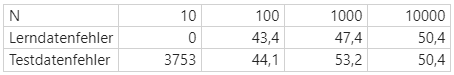

- **Beobachtung**: bei steigendem N wird der Test-Datenfehler kleiner (Lern-Datenfehler steigt dabei leicht)
- **Begründung**: je mehr Daten ich (in einem bestimmten Bereich) habe, desto unwahrscheinlicher/unmöglicher ist es eine (im bestimmten Bereich) stark oszillierende Funktion zu finden (=großes Overfitting) daher helfen mehr Daten dabei, Overfitting zu reduzieren => je mehr Daten ich habe, desto wahrscheinlicher ist es, dass die gefundene Funktion (im Datenbereich) die originale Funktion abbildet.

In [29]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=6000                                        # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=2                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
#print("training data error = ", getDataError(Y_train,T)/N)
#print("test data error = ", getDataError(Y_test,T_test)/N)
#print("W_LSR=",W_LSR)
#print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

W_LSR= [[ 2.09080823]
 [-0.99705204]
 [ 3.03158826]]


- Durch Ausprobieren (N=10,100,1000,5000,6000) zeigt sich, dass ca. bei N=6000 die Gewichte (2,-1,3) mit einer Abweichung von <10% getroffen werden.

## d)

- **Regularisierung** hilft dabei den **Effekt des Overfitting** bei linearen Regressionen zu **verringern**. Wie bereits oben erwähnt, deuten hohe Gewichte auf Overfitting hin. Der Ansatz der Regularisierung nimmt nun die Summe der Gewichte beziehungsweise die q-Norm des Gewichtsvektors (für q=2 entspricht das der euklidischen Länge des Gewichtsvektors) in die zu minimierende Fehlerfunktion mit auf. Somit werden bei der Minimierung der Fehlerfunktion große Gewichte bestraft und dadurch Overfitting reduziert.

lambda = 0:

In [82]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  6.121379950776229e-11
test data error =  37529.46503637709
mean weight =  33.4307454757652


lambda = 0.01:

In [83]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0.01                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  34.05186042439203
test data error =  6364.578341801348
mean weight =  14.596340243529088


lambda = 0.1:

In [84]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=0.1                                                          # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  106.92744753585548
test data error =  847.6887178422261
mean weight =  3.4180536892402813


lambda = 1:

In [85]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=1                                                           # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  134.61567675497696
test data error =  368.5967945183438
mean weight =  0.9811606165361744


lambda = 10:

In [86]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=10                                                          # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  158.09431539758128
test data error =  272.5295875920798
mean weight =  0.42991944508130714


In [30]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=20                                                          # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  169.91859679273807
test data error =  266.51924091701426
mean weight =  0.3145198799935035


lambda = 100:

In [87]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=100                                                          # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  212.98533792828155
test data error =  295.18957735479836
mean weight =  0.10356099151824291


lambda = 1000:

In [88]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=1000                                                          # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  245.54595461987873
test data error =  333.2755496676857
mean weight =  0.03382471662350579


lambda = 10000

In [89]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
#print("X=",X, "T=",T)

# (II) generate linear least squares model for regression
lmbda=10000                                                          # no regression
deg=9                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
#print("PHI=", PHI)
W_LSR = np.dot(np.dot(np.linalg.inv(np.dot(PHI.T,PHI)+lmbda*np.eye(M)),PHI.T),T)
#W_LSR = np.linalg.solve(PHI.T.dot(PHI)+lmbda*np.identity(PHI.shape[1]),PHI.T.dot(T))  # REPLACE THIS BY REGULARIZED LEAST SQUARES WEIGHTS!  
#print("W_LSR=",W_LSR)

# (III) make predictions for training and test data
Y_train = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X])  # REPLACE THIS BY PROGNOSIS FOR TRAINING DATA X! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_test = np.array([np.dot(W_LSR.T,np.array([phi_polynomial(x,deg)]).T)[0] for x in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("training data error = ", getDataError(Y_train,T))
print("test data error = ", getDataError(Y_test,T_test))
#print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))

training data error =  260.0201793141446
test data error =  355.23951254546256
mean weight =  0.02252536129443288


- wenn **lambda zu klein** gewählt wird, bekommt man das Overfitting-Problem nicht in den Griff.
- wenn **lambda zu groß** gewählt wird, legt man in der Fehlerfunktion zu viel Gewicht auf die Reduzierung der Gewichte und zu wenig Gewicht die Abweichungen mittels least squares zu minimieren sodass man zwar niedrige Gewichte erhält aber die Daten nicht gut trifft.
- unter den getesteten Lambdas erhält man mit **lambda=20** den kleinsten Generalisierungsfehler auf den Test-Daten
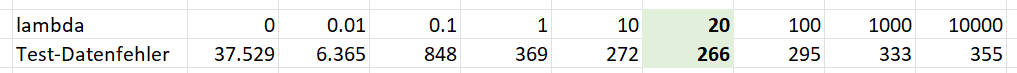